<a href="https://colab.research.google.com/github/gabrielalastra/PYTHON/blob/master/analysis_panda4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquivos que o pandas opera

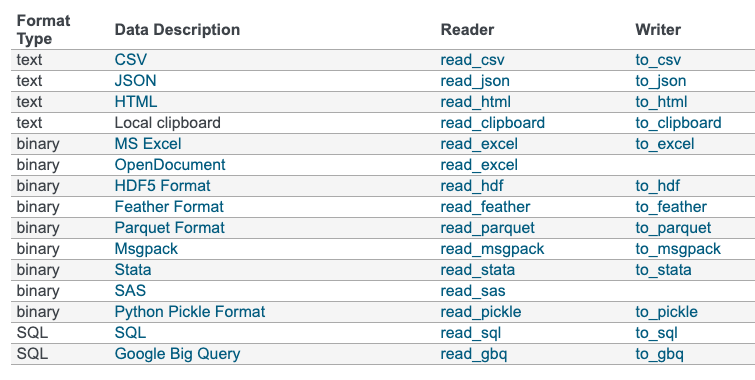

# PARAMETERS
filepath: Path of the file to be read.

sep: Character(s) that are used as a field separator in the file.

header: Index of the row containing the names of the columns (None if none).

index_col: Index of the column or sequence of indexes that should be used as index of rows of the data.

names: Sequence containing the names of the columns (used together with header = None).

skiprows: Number of rows or sequence of row indexes to ignore in the load.

na_values: Sequence of values that, if found in the file, should be treated as NaN.

dtype: Dictionary in which the keys will be column names and the values will be types of NumPy to which their content must be converted.

parse_dates: Flag that indicates if Python should try to parse data with a format similar to dates as dates. You can enter a list of column names that must be joined for the parsing as a date.

date_parser: Function to use to try to parse dates.

nrows: Number of rows to read from the beginning of the file.

skip_footer: Number of rows to ignore at the end of the file.

encoding: Encoding to be expected from the file read.

squeeze: Flag that indicates that if the data read only contains one column the result is a Series instead of a DataFrame.

thousands: Character to use to detect the thousands separator.

decimal: Character to use to detect the decimal separator.

skip_blank_lines: Flag that indicates whether blank lines should be ignored.


Full read_csv documentation can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html.


Para arquivos CSV e TXT

In [2]:
import pandas as pd

In [6]:
fpath = '/content/drive/MyDrive/ColabNotebooks/btc-market-price.csv'

In [7]:
with open(fpath, 'r') as reader:
  print(reader)

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabNotebooks/btc-market-price.csv' mode='r' encoding='UTF-8'>


In [8]:
#com o arquivo aberto podemos ler
with open(fpath, 'r') as reader:
  for index, line in enumerate(reader.readlines()):
    if (index<10): #as primeiras 10 linhas
      print(index, line)

0 2/4/17 0:00,1099.169125

1 3/4/17 0:00,1141.813

2 4/4/17 0:00,?

3 5/4/17 0:00,1133.079314

4 6/4/17 0:00,-

5 7/4/17 0:00,-

6 8/4/17 0:00,1181.149838

7 9/4/17 0:00,1208.8005

8 10/4/17 0:00,1207.744875

9 11/4/17 0:00,1226.617038



In [29]:
#o arquivo tem 2 colunas TimeStamp e Price e o cabeçalho
#foi definido automaticamente para a primeira linha
#mas ta errado, pq a primeira linha ja eh o dado
file = pd.read_csv(fpath, 
                   header=None,
                   na_values=[' ','?', '-'], #definindo o que sao NaN
                   names=['TimeStamp', 'Price'],
                   dtype={'Price':'float'},
                   parse_dates=[0],
                   index_col=[0])

In [30]:
file.head()

,Price
TimeStamp,
2017-02-04,1099.169125
2017-03-04,1141.813000
2017-04-04,NaN
2017-05-04,1133.079314
2017-06-04,NaN


In [28]:
#data como string
file.dtypes

TimeStamp    datetime64[ns]
Price               float64
dtype: object

In [25]:
#definir coluna como data e hr
file['TimeStamp'] = pd.to_datetime(file['TimeStamp'])
file.head()

,TimeStamp,Price
0,2017-02-04,1099.169125
1,2017-03-04,1141.813000
2,2017-04-04,NaN
3,2017-05-04,1133.079314
4,2017-06-04,NaN


In [26]:
file.dtypes

TimeStamp    datetime64[ns]
Price               float64
dtype: object

In [17]:
#outra tabela csv
fpath2 = ('/content/drive/MyDrive/ColabNotebooks/exam_review.csv')
file2 = pd.read_csv(fpath2,
                    sep='>', #separa as colunas
                    encoding='UTF-8',
                    decimal=',' #agora o math_scor e french_score sao float e nao string
                    ,skip_blank_lines=False #mostra linhas vazias
                    #,skiprows=[1,3] para deletar linhas
                    ) 
file2

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18.0,68.0,75.0
1,Melvin,Scott,24.0,77.0,83.0
2,Amirah,Haley,22.0,92.0,67.0
3,NaN,NaN,NaN,NaN,NaN
4,Gerard,Mills,19.0,78.0,72.0
5,Amy,Grimes,23.0,91.0,81.0


In [8]:
file2.dtypes

first_name       object
last_name        object
age               int64
math_score      float64
french_score    float64
dtype: object

In [18]:
#lenho uma coluna especifica
pd.read_csv(fpath2,
            usecols=['first_name', 'last_name', 'age'],
            sep='>'
          )

,first_name,last_name,age
0,Ray,Morley,18
1,Melvin,Scott,24
2,Amirah,Haley,22
3,Gerard,Mills,19
4,Amy,Grimes,23


In [19]:
pd.read_csv(fpath2,
            usecols=[0,1,2],
            sep='>')

,first_name,last_name,age
0,Ray,Morley,18
1,Melvin,Scott,24
2,Amirah,Haley,22
3,Gerard,Mills,19
4,Amy,Grimes,23


In [21]:
#usando uma serie como dataframe
DF = pd.read_csv(fpath2, sep='>', usecols=[0,1,2])
type(DF)

pandas.core.frame.DataFrame

In [23]:
#para salvar DF como CSV
DF.to_csv('testedelete.csv')

In [25]:
pd.read_csv('testedelete.csv')

,Unnamed: 0,first_name,last_name,age
0,0,Ray,Morley,18
1,1,Melvin,Scott,24
2,2,Amirah,Haley,22
3,3,Gerard,Mills,19
4,4,Amy,Grimes,23


In [27]:
#salvou com index
DF.to_csv('testedelete.csv',
          index=None)
DF

,first_name,last_name,age
0,Ray,Morley,18
1,Melvin,Scott,24
2,Amirah,Haley,22
3,Gerard,Mills,19
4,Amy,Grimes,23


In [5]:
#para abrir link de arquivo csv e salvar em uma variavel
csv_url = 'https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv'
df = pd.read_csv(csv_url).head()

In [4]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
